# Lab 7: Laboratory Notes - Week 7: Market-basket analysis & Linear Regression

In the past few weeks, you have experienced some of the different skills needed as a Data Scientist, these are mainly on collecting data, presenting the data through descriptive statistics and visualization, and wrangling data with some data preparation. We will explore more data preparation considerations (provide you with some guided practical experience) and conduct examples of data mining and machine learning algorithms.

## Associative Rule Mining using Apriori Algorithm

For this, our learning is about understanding associative rule mining and we will use the Apriori algorithm.  The important terms here are the "support" and "confidence" level.  Of course the term "lift" is also useful to know.  For the dataset for this, we will use the grocery store dataset that is available on [Kaggle](https://www.kaggle.com/datasets/sivaram1987/association-rule-learningapriori).  You can download it from Canvas or from the Kaggle site.  The data consists of 7.501 rows of transactions, where each row contains the list of grocery items sold in that one transaction (row).

Unfortunately for us, scikit-learn does not have any associative rule mining algorithm (as far as I know at this point in time).  We will import the apriori library from apyori (which you may need to install if it is not available - and this will be an exercise for you). 

![P1](picture/P1.png)

After you have ensured that  you have it installed, let's start with our laboratory.

<span style="color:red">import numpy as np  
import pandas as pd  
from apyori import apriori</span>

Then we read our CSV file of the grocery transactions.

<span style="color:red">df = pd.read_csv("Market_Basket_Optimisation.csv")  
""" or from the appropriate location."""</span>

We have read it using pandas which is captured in a DataFrame.  Do your normal data auditing, such as looking at the size (shape), and exploring what the data is like.  For this, it would actually be easier just to open it up in MS-Excel and have a look.  

#### Exercise 7.1:

Before we proceed, did we read the CSV file appropriately?  Hint: Was there a header in the CSV file or should it have been read without a header?

For the Apriori algorithm, we read it using the pandas DataFrames, but for Apriori, we need to have it in a list. Let's figure out how do we want the list to look like.  For the apriori algorithm, it requires the input to be a list of list, i.e., [ [ items in transaction 1], [items in transaction 2], [items in transaction 3], ... , [items in transaction n] ].  Do note that this is an important part of understanding your data pre-processing of the data for further processing.  You should check the documentation for such a situation and learn how to understand what is needed.  For this apriori function that we would like to use, the documentation can be found at https://pypi.org/project/apyori/. Do read the documentation and also the example.

So now we have a DataFrame which is in a tabular format.  For each row in the DataFrame, we are to create a list from the items.  Let's take this one step at a time as we also need to handle the empty or NaN or null cells.  When you have a look at the content using <span style="color:red">df.head()</span>, you would get

![P2](picture/P2.png)

The first row (observation) has 20 items but the subsequent rows has 3, 1, 2, and 5 items respectively.  There are a few programming challenges here.  How can we convert these individual observations into a single list and then have them all as a list of list?  First thing is how do we access the cell values?

df.values[0,1]

It is indexed by [row, column].  The above should return "almonds" as that's the first item in the DataFrame.

#### Exercise 7.2:

What happens when you access a cell marked by "NaN"?

We can read each cell value, and we would like to attempt to create a list of the values we have for each row.  Let's initialise a list first,

<span style="color:red">transaction = []  
transaction.append(df.values[0,0])</span>

This will give us one value in the list. Now, let us continue to append the next,

<span style="color:red">transaction.append(df.values[0,1])</span>

and the next,

<span style="color:red">transaction.append(df.values[0,2])</span>

How would you use the for loop to do this?

<span style="color:red">transaction = []  
for i in range(0,20):</span>  
<p style="margin-left: 40px;"><span style="color:red">transaction.append(df.values[0,i])</span></p>  

Instead of 20, we can use the function <span style="color:red">len()</span> to determine the number of columns to iterate across.

<span style="color:red">len(df)</span>

or

<span style="color:red">len(df.axes[0]) # full syntax</span>

will give the length in terms of rows, whereas

<span style="color:red">len(df.axes[1])</span>

will give the length in terms of columns (axis 0 indicated rows, whereas axis 1 indicates columns).

<span style="color:red">transaction = []  
for i in range(0,len(df.axes[1])):</span>
<p style="margin-left: 40px;"><span style="color:red">transaction.append(df.values[0,i])</span></p>

Now we have the pre-processing code for getting a list from each row.

#### Exercise 7.3:

Create a list of lists using the above code and iterate it through for the other rows.

This may be too difficult, so answer below :-).

<span style="color:red">transactions = []  
for i in range(0,len(df)):</span>  
<p style="margin-left: 40px;"><span style="color:red">transaction = []</span></p>  
<p style="margin-left: 40px;"><span style="color:red">for j in range(0,len(df.axes[1])):</span></p>  
<p style="margin-left: 80px;"><span style="color:red">transaction.append(df.values[i,j])</span></p>  
<p style="margin-left: 40px;"><span style="color:red">transactions.append(transaction)</span></p>  

Once you have done that, inspect your list of lists (in the example above, it is called 'transactions').  For the eagle-eyed, you may notice that the nan is not in quotes which indicates that it is not of type string.  We will come back to this in a short while.  Let us try to execute the apriori algorithm on our list of lists with the following minimum values (anything less we are not interested):

* support = 0.005
* confidence = 0.1
* lift = 3
* length = 2

<span style="color:red">rules = apriori(transactions, min_support=0.005, min_confidence=0.1, min_lift=3, min_length=2) # I use transactions as the variable from Exercise 3.  
results = list(rules)</span>

You may, or may not, encounter the following error (image from the bottom of the error message),

![P3](picture/P3.png)

What this means is that the 'nan' it encountered is of type float, and it was not able to process it.  What we needed to do is to type cast (do remember this term as it is useful) our values from the cells.  We would like you to note that having an incompatible type or data structure is a common challenge when you code. 

<span style="color:red">transactions = []  
for i in range(0,len(df)):</span>
<p style="margin-left: 40px;"><span style="color:red">transaction = []</span>
<p style="margin-left: 40px;"><span style="color:red">for j in range(0,len(df.axes[1])):</span>
<p style="margin-left: 80px;"><span style="color:red">transaction.append(str(df.values[i,j]))</span>
<p style="margin-left: 40px;"><span style="color:red">transactions.append(transaction)</span>

Inspect the content of the 'transactions' again and you will notice that the 'nan' are now encapsulated in quotes.  Rerun

<span style="color:red">rules = apriori(transactions, min_support=0.005, min_confidence=0.1, min_lift=3, min_length=2)  
results = list(rules)</span>

Then for each of the results obtained, you can print out sets that it has obtained that are common.

<span style="color:red">for i in range(0, len(results)):  
<p style="margin-left: 40px;"><span style="color:red">print(results[i][0])</span></p>

Inspect results and you will notice that it is a list of records, where each record is of the following format:

RelationRecord(  
<p style="margin-left: 40px;">items=frozenset({'mushroom cream sauce', 'escalope'}),</p>  
<p style="margin-left: 40px;">support=0.005733333333333333,</p>  
<p style="margin-left: 40px;">ordered_statistics=[</p>  
<p style="margin-left: 80px;">OrderedStatistic(</p>  
<p style="margin-left: 120px;">items_base=frozenset({'mushroom cream sauce'}),</p>  
<p style="margin-left: 120px;">items_add=frozenset({'escalope'}),</p>  
<p style="margin-left: 120px;">confidence=0.30069930069930073,</p>  
<p style="margin-left: 120px;">lift=3.7903273197390845</p>  
<p style="margin-left: 80px;">)</p>  
<p style="margin-left: 40px;">]</p>  
)  

You can go through each result to get the output (taken partially from https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/)

<span style="color:red">for item in results:</span>  
<p style="margin-left: 40px;"><span style="color:red">pair = item[0]</span></p>  
<p style="margin-left: 40px;"><span style="color:red">items = [x for x in pair]</span></p>  
<p style="margin-left: 40px;"><span style="color:red">print("Rule:       " + items[0] + " -> " + items[1])</span></p>  
<p style="margin-left: 40px;"><span style="color:red">print("Support:    " + str(item[1]))</span></p>  
<p style="margin-left: 40px;"><span style="color:red">print("Confidence: " + str(item[2][0][2]))</span></p>  
<p style="margin-left: 40px;"><span style="color:red">print("Lift:       " + str(item[2][0][3]))</span></p>  

The above is an example of what we call a Market Basket Analysis, and we used the Apriori Algorithm.  We have also looked at pre-processing necessary for the algorithm and are exposed to error messages for type mismatch for the algorithm to execute.  The pre-processing and the type issues are common in your journey as a data scientist.  It is important to understand these in order to be able to be an effective analyst.

#### Extra Exercise:

If you noticed, we have left the 'nan' in the list of items and, by right, we should remove this.  There is a function called filter() which can be used to filter out those 'nan' and leaving us with the correct transaction lists.  It can be done in various places.  In this case, I would like you to identify where would be the appropriate place for the code below (note that I am not indicating that this is the best place but merely for you to figure out the code and learn some other useful functions).

<span style="color:red">transaction = list(filter(lambda x: x != 'nan', transaction))</span>

You will need to read about "lambda" which is a nameless function, filter(), and why you need to list() the output.

## Linear Regression

Many of the principles and theories of statistical machine learning are about the behaviour of different learning algorithms with more, or with less data. We can demonstrate one of the fundamental machine learning algorithms, Linear Regression, using functions of one variable and we can examine these behaviours by changing our data and our models. This exploration gives us a guided introduction to the concepts behind the theory. In the second part of this week’s activity, you need to explore the linear regression.

## Basics of Linear Algorithms

Machine Learning (ML) is a method of data analysis to perform a specific task based on the existence of patterns in data and hence infer (predict) some outcome, instead of having explicit instructions. The statistics needed for this is called inferential statistics, as opposed to descriptive statistics that you have been introduced to. 

We start with our regular importing of libraries for Python.

<span style="color:red">import pandas as pd  
import random # added for data generation, introduced in last week's pseudo random generator and seed.  
import matplotlib.pyplot as plt  
%matplotlib inline # don’t forget this line</span>

The above may have an error message, what is it and how do you solve it?

Let's continue. Assume you have the following dataset (in a DataFrame form) about information of age and income of 40 people.

<span style="color:red">df = pd.DataFrame(  
<p style="margin-left: 40px;"><span style="color:red">{'Age' : [20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40],</span>  
<p style="margin-left: 40px;"><span style="color:red">'Income' :[2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3500,3600,3700,3800,3900,4000,4100,4200,4300,4400]}</span></p>  

<span style="color:red">)    
df.head()</span>  

Do you see any relation between Age and Income? We have already learned how to create different plots. Let's use a plot which can show the relation between two variables. By relation, we mean how the values of Income would change with the changes in the values of Age. We can show this relationship with a Scatter plot. Let's show a scatter plot of Age versus Income.

<span style="color:red">plt.scatter(df['Age'],df['Income'])  
""" plt.scatter(df.Age,df.Income) # if you like to use the '.' notation"""  
plt.xlabel('Age')  
plt.ylabel('Income')  
plt.show()</span>

![P4](picture/P4.png)

#### Exercise 7.4:

Considering the plot above, can you estimate what the Income of a 41 year old is?  (Not a trick question, something simple)

1) 2000
2) 3400
3) 3500
4) 4000
5) 4500

If you chose 4500, you are right! As you can see by increasing the age values, the income values also increase as well. You have detected the general pattern in this data set. The pattern in this data set is simple, as you increase the Age, Income also increases. Now let us change the data set slightly and add information of other people from a different country to see if the general pattern changes or not.

<span style="color:red">dfNewCountry= pd.DataFrame(</span>  
<p style="margin-left: 40px;"><span style="color:red">{'Age' : [21,27,28,39,35],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">'Income' :[2550,1600,1600,2300,3800]}</span></p>  

<span style="color:red">)  
dfAllCountries=pd.concat([df,dfNewCountry])</span>

Before we proceed, we have introduced a “new” pandas function called concat(). What does it do? It merges the two dataframes on the row axis. Compare this with the merge() function. Let’s now plot the scatter plot.

<span style="color:red">plt.scatter(dfAllCountries['Age'],dfAllCountries['Income'])  
plt.xlabel('Age')  
plt.title('Age vs Income in two countries')  
plt.ylabel('Income')  
plt.show()</span>

![P5](picture/P5.png)

Again, try to answer this question. Considering the plot above, can you guess which of the following Income would be the income of a person who is 41?

1) 2000  
2) 3400  
3) 3500  
4) 4000  
5) 4500  

If your answer is 4500, you are right again! In Machine Learning, patterns refer to a general pattern and we ignore the minority of data points which have different values from the majority. In the plot 'Age vs Income in two countries', we ignore information of 3 people whose income values were far from the rest. We just determine the pattern based on the general increasing relation between values of Age and Income. It seems that by detecting the general pattern, we are able to predict the income of people of varying ages. In the plot above, Age is called an independent variable or predictor whereas Income is a dependent variable or response variable. We use the independent variable to predict the value of the dependent variable, e.g., we use the variable 'Age' (independent variable) to predict the variable 'Income' (dependent Variable).

What you did to guess the income of a person who has 41, was an example of prediction. You took a look at the data and understood the relation between Age and Income for those who are between 18 and 40 and predicted the Income of a person who is 41. That's exactly what Machine Learning does. We give a dataset to a machine learning algorithm, it finds general patterns (by building models) and does predictions based on the given dataset. Then, the model predicts the income on the detected general pattern.

## Linear Regression Concept

One form of regression for continuous dependent variables with the help of independent variables is called Linear Regression. This is as opposed to Logistic Regression which is often (but not always) used to predict a categorical dependent variable with the help of independent variables. Logistic regression is often used for classification. We will look into classification later.

Let’s take a gentle path to understanding linear regression. First, create a data set and then we define a linear function to represent the general pattern between dependent and independent variables.

<span style="color:red">random.seed(123)  
indVar=random.sample(range(1, 30), 20)  
indVar</span>

We have introduced pseudo random number generators and the concept of seed.  To recap, computers generate the random numbers using some mathematical function and are based on a starting point. If this starting point is known, then the “random” numbers generated can be reproduced. This is where the term setting the seed number means in computing. Hence, to ensure that all of you have the same random numbers generated, we set the seed for the random library. Remember, you imported the library earlier and we set it by calling <span style="color:red">random.seed(123)</span>. After that, we can assign the variable <span style="color:red">indVar</span> by generating 20 numbers, within the range of 1 to 30 using <span style="color:red">random.sample(range(1, 30), 20)</span>.

Note that some of you may still be getting a different range of numbers as the setting of the seed may not be equal for all OS or machine architecture (32-bit, 64-bit, processor type, etc.). Now we have a variable IndVar that contains a list of 20 numbers.

<span style="color:red">indVar</span>

Should return the following output.

[2, 9, 3, 25, 14, 28, 4, 29, 13, 18, 20, 11, 19, 22, 27, 15, 6, 24, 21, 23]

Let’s create a set of dependent variables that are of the same values. (Note the way we make a copy of it, it is different from <span style="color:red">depVar = indVar</span>) . 

#### Exercise 7.7: 

What's the difference with <span style="color:red">depVar = indVar</span>?

<span style="color:red">depVar = indVar[:]</span>

Now we have 2 sets of data points, where the independent and dependent data are the same. The purpose of this is purely for illustration only. Let’s plot the data using a scatter plot to view it.

<span style="color:red">plt.scatter(indVar,depVar)  
plt.show()</span>

![P6](picture/P6.png)

Let’s plot a line across those points.

<span style="color:red">plt.scatter(indVar,depVar)  
plt.plot(indVar,depVar,'r-', linewidth=3) # red line, of thickness 3  
plt.show()</span>

![P7](picture/P7.png)

What we are trying to illustrate so far is that if the numbers are accurately related in a linear manner, we can draw a straight line through it. Let’s now assume that this relationship is the true (actual) relationship between the independent and dependent variables. Let’s call these the true numbers.

<span style="color:red">trueX = indVar[:]  
trueY = depVar[:]</span>

Let’s generate what we may find as real data (again, this is just simulated). Usually, in any data collection, the data that is recorded may not be the exact figure, for example measurements from analog devices, or measuring non-digital measures, or measurements that are recorded manually by humans. We simulate this by adding some noise (noise in this case means additional data that are random (unpredictable) and carries no real useful information).

Let’s firstly add additional data points to our independent variable.

<span style="color:red">noiseXVals=random.sample(range(1, 30), 10)  
indVar.extend(noiseXVals)</span>

We now have 30 data points for our independent variable. You can have a look at the <span style="color:red">indVar</span> values. What we need to do now is to add another 10 values to our dependent variables, <span style="color:red">depVar</span> but the values should be not exactly that of the new independent variables but values that are slightly different. What we are going to do here is to pick those new values from <span style="color:red">noiseXVals</span> using the for “<span style="color:red">x in noiseXVals</span>” and add some minor noise to it.  (Please be reminded that this is for illustration purposes and we are creating noisy data).

<span style="color:red">noiseYVals=[x+round(random.uniform(-10,6)) for x in noiseXVals]  
depVar.extend(noiseYVals)</span>

Before you execute the extend(), you may want to have a look at the values of <span style="color:red">noiseXVals</span> and <span style="color:red">noiseYVals</span>. The random.uniform() function, creates floating point numbers between -10 and 8 (you can change the parameters if you like) and the round() function just rounds up the number to the nearest integer.

Now, we replot the graph and have a look at it.

<span style="color:red">plt.scatter(indVar,depVar)  
""" the red line represents the true data"""  
plt.plot(trueX,trueY,'r-', linewidth=3)  
plt.show()</span>

![P8](picture/P8.png)

Assuming that the new dots are the data that you have. The red straight line now doesn’t seem to be the best fit. The red line seems to be a bit higher than it should be, from a human eye-balling perspective.

What if data is scattered more? Let us add more noise to this data set by following commands and see if we can still represent the general trend by a line.

<span style="color:red">noiseXVals=random.sample(range(1, 30), 25)  
indVar.extend(noiseXVals)  
noiseYVals=[x+round(random.uniform(-10,6)) for x in noiseXVals]  
depVar.extend(noiseYVals)  
plt.scatter(indVar,depVar)  
plt.plot(trueX,trueY,'r-', linewidth=3)  
plt.show()</span>

![P9](picture/P9.png)

Do you think that the red line which you plotted is the best line? Let’s plot another line which has a y-axis value that is smaller (by 1.5).

<span style="color:red">trueYNew=[x-1.5 for x in trueY]  
Let’s plot the alternate line.  
plt.scatter(indVar,depVar)  
plt.plot(trueX,trueY,'r-', linewidth=3)  
plt.plot(trueX,trueYNew,'g-', linewidth=3)  
plt.show()</span>

![P10](picture/P10.png)

Does the green line look like a better fit? How can you evaluate it?  We have plotted the data and have manually estimated a "green" line that seem to be a better representation.  We have taken great lengths to get a non-mathematical approach to understanding the best fit, with the high level idea of what a linear regression is like. Now, we are going to look at a library in Python that we can use to create linear regression models.

<span style="color:red">import numpy as np # need this to reshape our input data for the LinearRegression() function  
from sklearn.model_selection import train_test_split # please refer to last week's class  
from sklearn.linear_model import LinearRegression # the linear regression function we will use</span>

Let's relook at our 2 independent and dependent variables.

<span style="color:red">plt.scatter(indVar,depVar)</span>

![P11](picture/P11.png)

Again, some data preparation for using the scikit-learn LinearRegression() function.  It requires as it's input a list of list of single values, i.e., [[X1],[X2],[X3],...,[Xn]].

<span style="color:red">X = np.array(indVar).reshape(-1, 1)  
y = np.array(depVar).reshape(-1, 1)</span>

You can explore it by looking at each part step by step, i.e.,

<span style="color:red">indVar</span>

Then what happens if you put it into an np.array

<span style="color:red">np.array(indVar)</span>

And then use the reshape,

<span style="color:red">np.array(indVar).reshape(-1, 1)</span>

Then try to use <span style="color:red">reshape(1, -1)</span>.  Again, eagle-eyed will notice the extra  [ ].

Once we have the independent variable (now call 'X') and the dependent variable (now call 'y'), we can do a train and test dataset.  We reserve 20% of our data for testing.  Do recall the last part of last week's laboratory on how the function train_test_split() is typically used.

<span style="color:red">X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)</span>

Let's now use the scikit-learn LinearRegression() function.

<span style="color:red">reg = LinearRegression()  
reg.fit(X_train, y_train)</span>

Do note that the fit() function means that we ask the algorithm to build the model using the data provided.  We can then predict using the testing data.

<span style="color:red">reg.predict(X_test)</span>

You will obtain the predicted output and you can compare this with the y_test values.

<span style="color:red">y_test</span>

In a linear regression, you can obtain the score.  In simple terms, a score of 1.0 means it is a good predictor.

<span style="color:red">reg.score(X_test, y_test)</span>

Let's plot the prediction.

<span style="color:red">y_pred = reg.predict(X_test)  
plt.scatter(X_test, y_test, color ='b')  
plt.plot(X_test, y_pred, color ='r')  
plt.show()</span>

![P12](picture/P12.png)

We hope that you have enjoyed this rather long laboratory session and it contains some practical guide on not only the concepts of associative rule mining and linear regression, but also the need to pre-process the data for the functions and expanded the train and test concept in machine learning.

## My code part

#### Associative Rule Mining using Apriori Algorithm

In [1]:
import numpy as np
import pandas as pd
from apyori import apriori

In [3]:
df = pd.read_csv("data/Market_Basket_Optimisation.csv")
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exercice 7.1:

In [5]:
df = pd.read_csv("data/Market_Basket_Optimisation.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.values[0,1]

'almonds'

#### Exercice 7.2:

In [7]:
transaction = []
for i in range(0,len(df.axes[1])):
    transaction.append(df.values[0,i])
print(transaction)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


#### Exercice 7.3

In [8]:
transactions = []
for i in range(0,len(df)):
    transaction = []
    for j in range(0,len(df.axes[1])):
        transaction.append(df.values[i,j])
    transactions.append(transaction)

In [9]:
rules = apriori(transactions, min_support=0.005, min_confidence=0.1, min_lift=3, min_length=2) # I use transactions as the variable from Exercise 3.
results = list(rules)

TypeError: '<' not supported between instances of 'float' and 'str'

In [10]:
transactions = []
for i in range(0,len(df)):
    transaction = []
    for j in range(0,len(df.axes[1])):
        transaction.append(str(df.values[i,j]))
    transactions.append(transaction)

In [11]:
rules = apriori(transactions, min_support=0.005, min_confidence=0.1, min_lift=3, min_length=2)
results = list(rules)

In [12]:
for i in range(0, len(results)):
    print(results[i][0])

frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'escalope', 'pasta'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'whole wheat pasta', 'olive oil'})
frozenset({'shrimp', 'pasta'})
frozenset({'chocolate', 'shrimp', 'frozen vegetables'})
frozenset({'mushroom cream sauce', 'escalope', 'nan'})
frozenset({'escalope', 'nan', 'pasta'})
frozenset({'spaghetti', 'ground beef', 'frozen vegetables'})
frozenset({'shrimp', 'frozen vegetables', 'mineral water'})
frozenset({'spaghetti', 'olive oil', 'frozen vegetables'})
frozenset({'spaghetti', 'shrimp', 'frozen vegetables'})
frozenset({'spaghetti', 'tomatoes', 'frozen vegetables'})
frozenset({'grated cheese', 'ground beef', 'spaghetti'})
frozenset({'herb & pepper', 'ground beef', 'mineral water'})
frozenset({'nan', 'herb & pepper', 'ground beef'})
frozenset({'spaghetti', 'herb & pepper', 'ground beef'})
frozenset({'nan', 'tomato sauce', 'ground beef'})
frozenset({'spaghetti', 'ground be

In [13]:
for item in results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule:       " + items[0] + " -> " + items[1])
    print("Support:    " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift:       " + str(item[2][0][3]))

Rule:       mushroom cream sauce -> escalope
Support:    0.005732568990801226
Confidence: 0.3006993006993007
Lift:       3.790832696715049
Rule:       escalope -> pasta
Support:    0.005865884548726837
Confidence: 0.3728813559322034
Lift:       4.700811850163794
Rule:       herb & pepper -> ground beef
Support:    0.015997866951073192
Confidence: 0.1628222523744912
Lift:       3.291993841134928
Rule:       tomato sauce -> ground beef
Support:    0.005332622317024397
Confidence: 0.3773584905660377
Lift:       3.840659481324083
Rule:       whole wheat pasta -> olive oil
Support:    0.007998933475536596
Confidence: 0.12145748987854252
Lift:       4.1224100976422955
Rule:       shrimp -> pasta
Support:    0.005065991201173177
Confidence: 0.3220338983050847
Lift:       4.506672147735896
Rule:       chocolate -> shrimp
Support:    0.005332622317024397
Confidence: 0.23255813953488375
Lift:       3.2545123221103784
Rule:       mushroom cream sauce -> escalope
Support:    0.005732568990801226
C

#### Extra Exercise: 

In [15]:
transaction = list(filter(lambda x: x != 'nan', transaction))
print(transaction)

['eggs', 'frozen smoothie', 'yogurt cake', 'low fat yogurt']


#### Basics of Linear Algorithms

In [16]:
import random # added for data generation, introduced in last week's pseudo random generator and seed.
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {'Age' : [20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40],
     'Income' :[2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3500,3600,3700,3800,3900,4000,4100,4200,4300,4400]}
)
df.head()

,Age,Income
0,20,2400
1,21,2500
2,22,2600
3,23,2700
4,24,2800


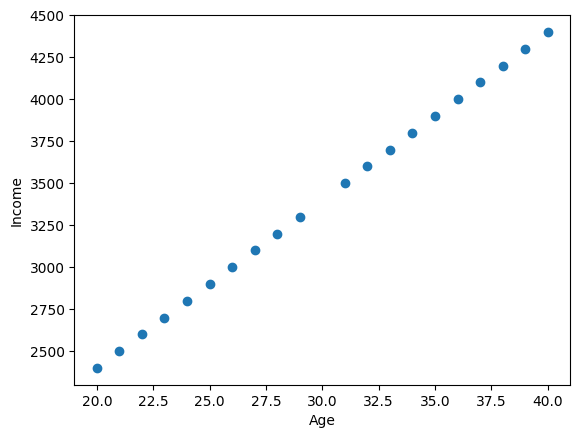

In [17]:
plt.scatter(df['Age'],df['Income'])
# plt.scatter(df.Age,df.Income) # if you like to use the '.' notation
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#### Exercice 7.4:

answear 5. 4500

In [19]:
dfNewCountry= pd.DataFrame(
    {'Age' : [21,27,28,39,35],
     'Income' :[2550,1600,1600,2300,3800]}
)
dfAllCountries=pd.concat([df,dfNewCountry])

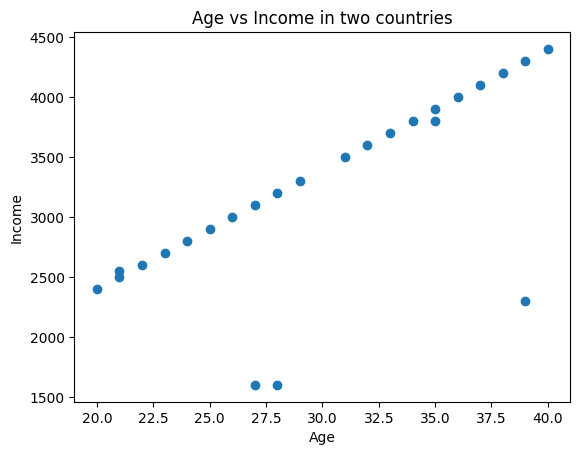

In [20]:
plt.scatter(dfAllCountries['Age'],dfAllCountries['Income'])
plt.xlabel('Age')
plt.title('Age vs Income in two countries')
plt.ylabel('Income')
plt.show()

answear 5. 4500

#### Linear Regression Concept

In [21]:
random.seed(123)
indVar=random.sample(range(1, 30), 20)
indVar

[2, 9, 3, 25, 14, 28, 4, 29, 13, 18, 20, 11, 19, 22, 27, 15, 6, 24, 21, 23]

#### Exercice 7.7:

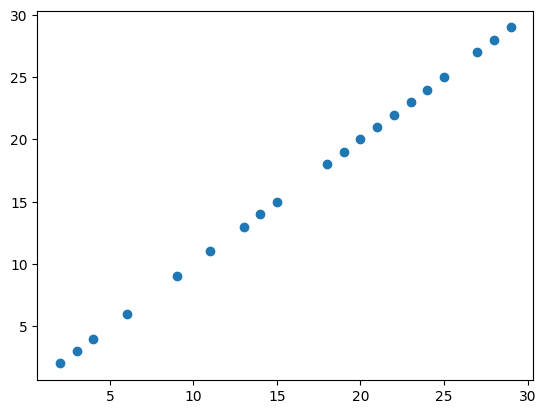

In [22]:
depVar = indVar[:]
plt.scatter(indVar,depVar)
plt.show()

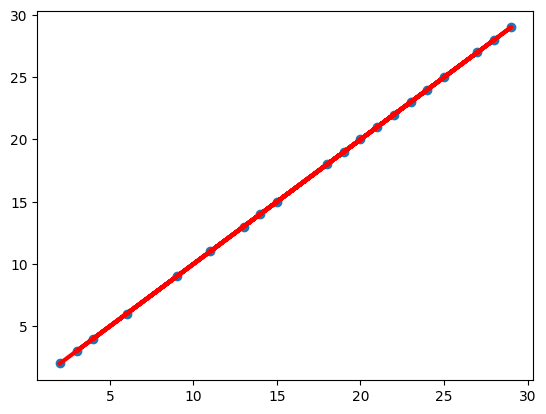

In [23]:
plt.scatter(indVar,depVar)
plt.plot(indVar,depVar,'r-', linewidth=3) # red line, of thickness 3
plt.show()

In [24]:
trueX = indVar[:]
trueY = depVar[:]

In [25]:
noiseXVals=random.sample(range(1, 30), 10)
indVar.extend(noiseXVals)

In [26]:
noiseYVals=[x+round(random.uniform(-10,6)) for x in noiseXVals]
depVar.extend(noiseYVals)

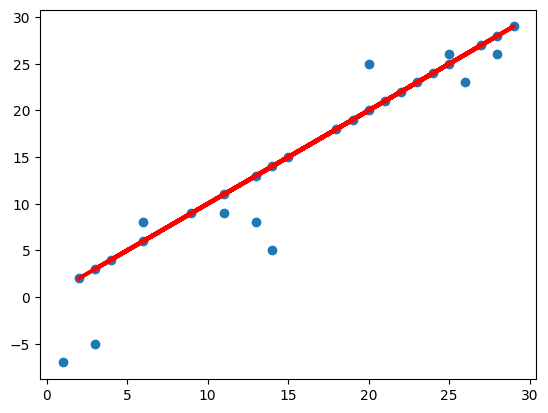

In [27]:
plt.scatter(indVar,depVar)
# the red line represents the true data
plt.plot(trueX,trueY,'r-', linewidth=3)
plt.show()

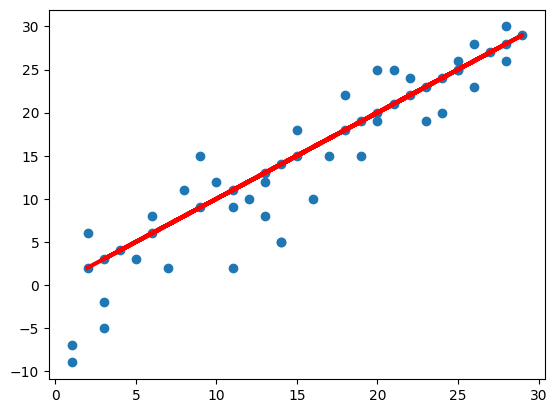

In [28]:
noiseXVals=random.sample(range(1, 30), 25)
indVar.extend(noiseXVals)
noiseYVals=[x+round(random.uniform(-10,6)) for x in noiseXVals]
depVar.extend(noiseYVals)
plt.scatter(indVar,depVar)
plt.plot(trueX,trueY,'r-', linewidth=3)
plt.show()

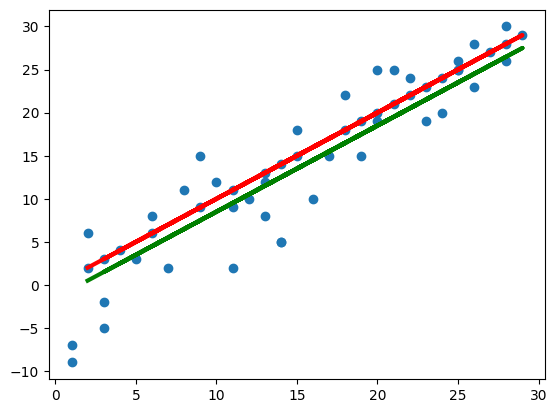

In [29]:
trueYNew=[x-1.5 for x in trueY]
#Let’s plot the alternate line.
plt.scatter(indVar,depVar)
plt.plot(trueX,trueY,'r-', linewidth=3)
plt.plot(trueX,trueYNew,'g-', linewidth=3)
plt.show()

In [30]:
import numpy as np # need this to reshape our input data for the LinearRegression() function
from sklearn.model_selection import train_test_split # please refer to last week's class
from sklearn.linear_model import LinearRegression # the linear regression function we will use

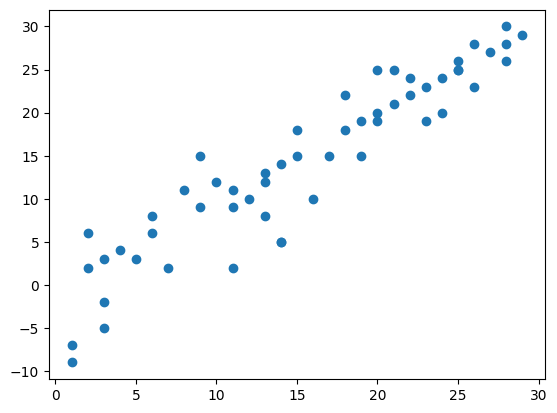

In [31]:
plt.scatter(indVar,depVar)

In [32]:
X = np.array(indVar).reshape(-1, 1)
y = np.array(depVar).reshape(-1, 1)

In [33]:
indVar


[2,
 9,
 3,
 25,
 14,
 28,
 4,
 29,
 13,
 18,
 20,
 11,
 19,
 22,
 27,
 15,
 6,
 24,
 21,
 23,
 6,
 1,
 14,
 25,
 3,
 20,
 13,
 26,
 28,
 11,
 2,
 25,
 10,
 11,
 17,
 16,
 7,
 20,
 21,
 28,
 19,
 26,
 1,
 13,
 15,
 24,
 18,
 9,
 23,
 12,
 8,
 14,
 3,
 5,
 22]

In [34]:
np.array(indVar)

array([ 2,  9,  3, 25, 14, 28,  4, 29, 13, 18, 20, 11, 19, 22, 27, 15,  6,
       24, 21, 23,  6,  1, 14, 25,  3, 20, 13, 26, 28, 11,  2, 25, 10, 11,
       17, 16,  7, 20, 21, 28, 19, 26,  1, 13, 15, 24, 18,  9, 23, 12,  8,
       14,  3,  5, 22])

In [35]:
np.array(indVar).reshape(-1, 1)

array([[ 2],
       [ 9],
       [ 3],
       [25],
       [14],
       [28],
       [ 4],
       [29],
       [13],
       [18],
       [20],
       [11],
       [19],
       [22],
       [27],
       [15],
       [ 6],
       [24],
       [21],
       [23],
       [ 6],
       [ 1],
       [14],
       [25],
       [ 3],
       [20],
       [13],
       [26],
       [28],
       [11],
       [ 2],
       [25],
       [10],
       [11],
       [17],
       [16],
       [ 7],
       [20],
       [21],
       [28],
       [19],
       [26],
       [ 1],
       [13],
       [15],
       [24],
       [18],
       [ 9],
       [23],
       [12],
       [ 8],
       [14],
       [ 3],
       [ 5],
       [22]])

In [36]:
np.array(indVar).reshape(1, -1)

array([[ 2,  9,  3, 25, 14, 28,  4, 29, 13, 18, 20, 11, 19, 22, 27, 15,
         6, 24, 21, 23,  6,  1, 14, 25,  3, 20, 13, 26, 28, 11,  2, 25,
        10, 11, 17, 16,  7, 20, 21, 28, 19, 26,  1, 13, 15, 24, 18,  9,
        23, 12,  8, 14,  3,  5, 22]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
reg.predict(X_test)

array([[28.18150001],
       [10.03852641],
       [11.17246226],
       [21.37788491],
       [ 5.50278301],
       [ 0.96703961],
       [12.30639811],
       [ 6.63671886],
       [11.17246226],
       [16.84214151],
       [ 3.23491131]])

In [40]:
y_test

array([[30],
       [10],
       [13],
       [22],
       [11],
       [ 4],
       [14],
       [ 9],
       [12],
       [18],
       [ 6]])

In [41]:
reg.score(X_test, y_test)

0.8831645370544983

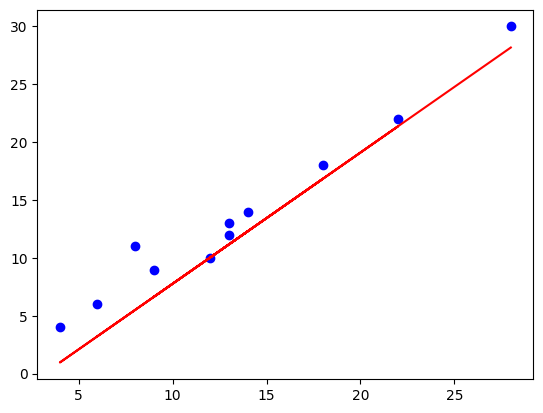

In [42]:
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='r')
plt.show()